In [14]:
#Wstępne konfiguracje, aby móc pobierać każdy rodzaj danych z kaggle
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [16]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"


In [17]:
%cd /content/gdrive/MyDrive/Kaggle

/content/gdrive/MyDrive/Kaggle


In [19]:
!kaggle datasets download -d mohansacharya/graduate-admissions

  0% 0.00/9.64k [00:00<?, ?B/s]
100% 9.64k/9.64k [00:00<00:00, 2.86MB/s]


In [22]:
ls

Admission_Predict.csv  Admission_Predict_Ver1.1.csv  kaggle.json


In [21]:
!unzip \*.zip && rm *.zip

Archive:  graduate-admissions.zip
  inflating: Admission_Predict.csv   
  inflating: Admission_Predict_Ver1.1.csv  


In [23]:
import numpy as np
# Powerful n-dimensional arrays. Numerical computing tools. Interoperable:

import pandas as pd
# python powerfull library used for data manipulating and data analysis:

import matplotlib.pyplot as plt
# mayplotlib is a ploting library we can use this to make awesome graphs:

import seaborn as sns
# seaborn also a ploting library we can use this to make awesome graphs:

%matplotlib inline
# %matplotlib inline sets the backend of matplotlib to the inline:

In [24]:
#Go get the solution/model!
# Linear Regression Model 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random
from sklearn import metrics

In [26]:
#So now we can load data
data = pd.read_csv('/content/gdrive/MyDrive/Kaggle/Admission_Predict_Ver1.1.csv')

In [27]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [29]:
#Serial No. is useless so I drop it
data.drop('Serial No.', axis=1, inplace=True)
# axis = 1 because of its by default axis=0 . axis  = 0 means row wise , axis = 1 means column wise
# inplace = True . mean we want this changing in our main dataset

In [30]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [31]:
#More analysis this data by their visualisation
data.describe()
#25% means that 25% of the data have the value 308 or below
#std - standard deviation (I always forgot this shortcut)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [32]:
#pairwise correlations (between x and y)
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


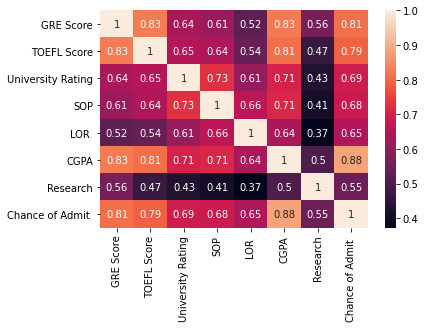

In [33]:
#można oczopląsu dostać, below is much better
sns.heatmap(data.corr(), annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


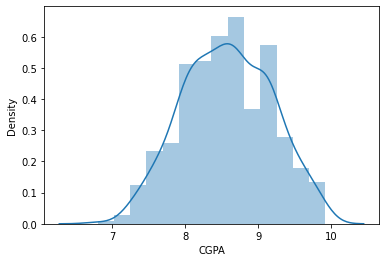

In [34]:
#gęstość/zwatość danych
sns.distplot(data['CGPA'])

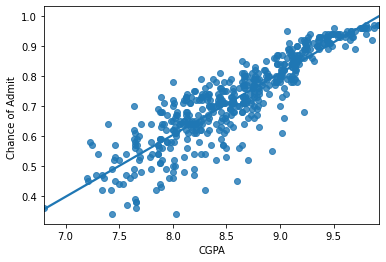

In [37]:
#Analysing 3 the most correlated
sns.regplot(x='CGPA',y='Chance of Admit ',data=data,ci=None)

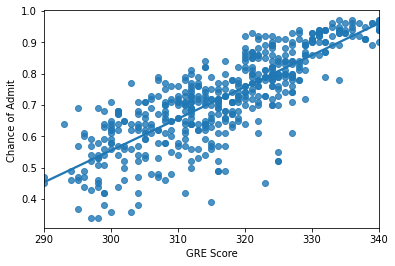

In [38]:
sns.regplot(x='GRE Score',y='Chance of Admit ',data=data,ci=None)

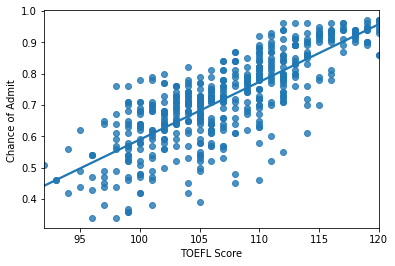

In [39]:
sns.regplot(x='TOEFL Score',y='Chance of Admit ',data=data,ci=None)

In [40]:
x = data[['CGPA','GRE Score','TOEFL Score']]

In [41]:
y = data[['Chance of Admit ']]

In [42]:
# Split data for test and train the model.
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size=.20)

In [45]:
# x shape
print(x.shape)
print(x_train.shape)

(500, 3)
(400, 3)


In [50]:
#I could do this like 4th task (Boston Housing) but I try new way
#object
linreg = LinearRegression()
# fiting our data for training
linreg.fit(x_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
# our model is ready to predict y.
y_predict = linreg.predict(x_test)
# our model prediction
y_predict[:10]

array([[0.62802152],
       [0.83209435],
       [0.79119818],
       [0.85046086],
       [0.60222891],
       [0.66888863],
       [0.55297329],
       [0.68293116],
       [0.55296602],
       [0.7583334 ]])

In [53]:
#Compare y_test & y_predict to find model acc
# y test
y_test[:10]

,Chance of Admit
90,0.64
254,0.85
283,0.80
445,0.91
461,0.68
15,0.54
316,0.54
489,0.65
159,0.52
153,0.79


In [54]:
metrics.mean_absolute_error(y_test,y_predict)
#Świetnie! My model is in 96% correct

0.04688621359385711